# Assignment 11 - MOM and MLE


* Sayeed Ahmed
* Kaviprakash Ramalingam



## HW1

Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MOM. 

#Data source: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.



In [46]:
import pandas as pd

In [47]:
csv_file_path = 'data/pjm_data.csv'

df = pd.read_csv(csv_file_path)

print(df.head()) 

     Date     AM12      AM1      AM2      AM3      AM4      AM5      AM6  \
0  4/1/98      NaN  22259.0  21244.0  20651.0  20421.0  20713.0  22526.0   
1  4/2/98  23238.0  21291.0  20302.0  19802.0  19675.0  19941.0  21628.0   
2  4/3/98  22795.0  20905.0  19974.0  19215.0  19488.0  19928.0  21647.0   
3  4/4/98  22815.0  21063.0  20132.0  19540.0  19364.0  19383.0  20068.0   
4  4/5/98  23352.0  21501.0  20918.0      NaN  20595.0  20506.0  20720.0   

       AM7      AM8  ...      PM2      PM3      PM4      PM5      PM6  \
0  25772.0  28724.0  ...  31235.0  30887.0  30724.0  30863.0  30927.0   
1  25032.0  27850.0  ...  30175.0  29989.0  29688.0  29028.0  28891.0   
2  24848.0  27802.0  ...  28443.0  28122.0  27632.0  27335.0  27253.0   
3  21049.0  22948.0  ...  26544.0  26120.0  25791.0  26064.0  26859.0   
4  21330.0  22027.0  ...  24332.0  23767.0  23428.0  23372.0  23739.0   

       PM7      PM8      PM9     PM10     PM11  
0  31376.0  31636.0  30637.0  28572.0  25724.0  
1  294

### The Histogram

Data exploration with the ***histogram*** of precipitations, hour by hour. The histogram of a specific hour tells us how the other values are distributed.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

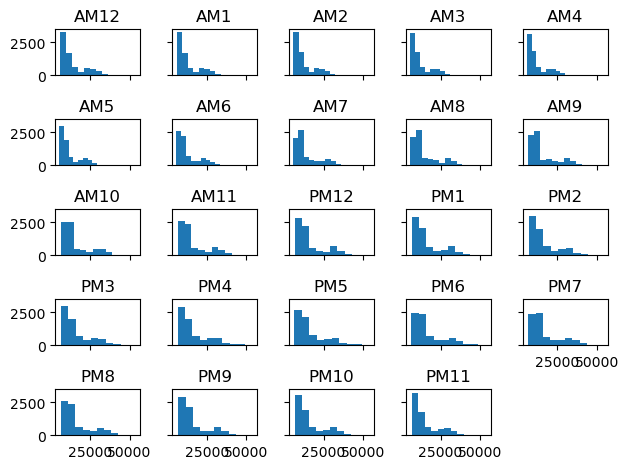

In [49]:
_ = df.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

### Data Cleansing 

Replaces the NaN values with the mean of the 'AM12' column

In [50]:
df.fillna(value={'AM12': df.AM12.mean()}, inplace=True)
df

,Date,AM12,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,...,PM2,PM3,PM4,PM5,PM6,PM7,PM8,PM9,PM10,PM11
0,4/1/98,14135.483721,22259.0,21244.0,20651.0,20421.0,20713.0,22526.0,25772.0,28724.0,...,31235.0,30887.0,30724.0,30863.0,30927.0,31376.0,31636.0,30637.0,28572.0,25724.0
1,4/2/98,23238.000000,21291.0,20302.0,19802.0,19675.0,19941.0,21628.0,25032.0,27850.0,...,30175.0,29989.0,29688.0,29028.0,28891.0,29438.0,30656.0,29696.0,28080.0,25350.0
2,4/3/98,22795.000000,20905.0,19974.0,19215.0,19488.0,19928.0,21647.0,24848.0,27802.0,...,28443.0,28122.0,27632.0,27335.0,27253.0,28024.0,29065.0,28384.0,26724.0,24807.0
3,4/4/98,22815.000000,21063.0,20132.0,19540.0,19364.0,19383.0,20068.0,21049.0,22948.0,...,26544.0,26120.0,25791.0,26064.0,26859.0,27833.0,28366.0,27784.0,26848.0,25269.0
4,4/5/98,23352.000000,21501.0,20918.0,NaN,20595.0,20506.0,20720.0,21330.0,22027.0,...,24332.0,23767.0,23428.0,23372.0,23739.0,23905.0,25098.0,27354.0,26830.0,25191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,7/29/18,8611.300000,7976.7,7493.9,7162.2,6919.8,6778.5,6752.3,6753.7,6952.1,...,9980.6,10315.7,10579.6,10818.8,10956.8,10870.6,10544.7,10253.1,10029.7,9414.8
7425,7/30/18,8697.500000,8072.5,7662.2,7386.1,7256.9,7314.8,7636.4,8161.2,8702.6,...,10811.5,10901.6,11001.6,11021.3,11016.9,10859.0,10599.5,10415.0,10169.6,9523.4
7426,7/31/18,8770.600000,8165.9,7730.4,7481.3,7351.7,7427.3,7757.8,8313.8,8857.3,...,11008.0,11181.4,11281.7,11399.6,11441.5,11277.3,11028.3,10897.7,10641.0,10018.1
7427,8/1/18,9245.200000,8622.6,8190.3,7925.5,7774.6,7798.3,8143.0,8705.6,9255.7,...,11902.2,12177.6,12418.0,12544.2,12560.1,12340.2,11981.3,11698.6,11355.9,10597.7


In [51]:
df['Date'] = pd.to_datetime(df['Date'])

# Convert columns from 'AM12' to 'PM11' to numeric values
time_columns = ['AM12', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AM9', 'AM10', 'AM11',
                'PM12', 'PM1', 'PM2', 'PM3', 'PM4', 'PM5', 'PM6', 'PM7', 'PM8', 'PM9', 'PM10', 'PM11']

for col in time_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

/var/folders/51/nlbf19z54pn48lrft00tz1600000gn/T/ipykernel_37411/2501273046.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [52]:
df.fillna(value={'PM11': df.PM11.mean()}, inplace=True)
df

,Date,AM12,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,...,PM2,PM3,PM4,PM5,PM6,PM7,PM8,PM9,PM10,PM11
0,1998-04-01,14135.483721,22259.0,21244.0,20651.0,20421.0,20713.0,22526.0,25772.0,28724.0,...,31235.0,30887.0,30724.0,30863.0,30927.0,31376.0,31636.0,30637.0,28572.0,25724.0
1,1998-04-02,23238.000000,21291.0,20302.0,19802.0,19675.0,19941.0,21628.0,25032.0,27850.0,...,30175.0,29989.0,29688.0,29028.0,28891.0,29438.0,30656.0,29696.0,28080.0,25350.0
2,1998-04-03,22795.000000,20905.0,19974.0,19215.0,19488.0,19928.0,21647.0,24848.0,27802.0,...,28443.0,28122.0,27632.0,27335.0,27253.0,28024.0,29065.0,28384.0,26724.0,24807.0
3,1998-04-04,22815.000000,21063.0,20132.0,19540.0,19364.0,19383.0,20068.0,21049.0,22948.0,...,26544.0,26120.0,25791.0,26064.0,26859.0,27833.0,28366.0,27784.0,26848.0,25269.0
4,1998-04-05,23352.000000,21501.0,20918.0,NaN,20595.0,20506.0,20720.0,21330.0,22027.0,...,24332.0,23767.0,23428.0,23372.0,23739.0,23905.0,25098.0,27354.0,26830.0,25191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,2018-07-29,8611.300000,7976.7,7493.9,7162.2,6919.8,6778.5,6752.3,6753.7,6952.1,...,9980.6,10315.7,10579.6,10818.8,10956.8,10870.6,10544.7,10253.1,10029.7,9414.8
7425,2018-07-30,8697.500000,8072.5,7662.2,7386.1,7256.9,7314.8,7636.4,8161.2,8702.6,...,10811.5,10901.6,11001.6,11021.3,11016.9,10859.0,10599.5,10415.0,10169.6,9523.4
7426,2018-07-31,8770.600000,8165.9,7730.4,7481.3,7351.7,7427.3,7757.8,8313.8,8857.3,...,11008.0,11181.4,11281.7,11399.6,11441.5,11277.3,11028.3,10897.7,10641.0,10018.1
7427,2018-08-01,9245.200000,8622.6,8190.3,7925.5,7774.6,7798.3,8143.0,8705.6,9255.7,...,11902.2,12177.6,12418.0,12544.2,12560.1,12340.2,11981.3,11698.6,11355.9,10597.7


# Method of Moments

The **method of moments** simply assigns the **empirical** (*coming from the data*) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters*** of the Gamma!

<br />
<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

## Calculate the mean

In [53]:
df_mean = df.mean(numeric_only=True)
df_mean

AM12    14135.483721
AM1     13161.309384
AM2     12587.936335
AM3     12271.346120
AM4     12131.356658
AM5     12254.838878
AM6     12871.081664
AM7     14014.187140
AM8     14961.544163
AM9     15547.500265
AM10    15977.077998
AM11    16309.943798
PM12    16482.750745
PM1     16538.158544
PM2     16588.945010
PM3     16568.141025
PM4     16569.590191
PM5     16750.168759
PM6     17104.128360
PM7     17152.612163
PM8     17010.934036
PM9     16883.293876
PM10    16394.632614
PM11    15327.897773
dtype: float64

## Calculate the Variance

In [54]:
# Calculate variance for numerical columns, excluding non-numeric automatically
df_var = df.var(numeric_only=True)
df_var


AM12    5.372142e+07
AM1     4.537158e+07
AM2     4.110452e+07
AM3     3.906347e+07
AM4     3.810701e+07
AM5     3.895827e+07
AM6     4.387741e+07
AM7     5.506146e+07
AM8     6.507375e+07
AM9     7.048142e+07
AM10    7.446804e+07
AM11    7.811384e+07
PM12    8.016944e+07
PM1     8.068858e+07
PM2     8.180011e+07
PM3     8.195679e+07
PM4     8.210327e+07
PM5     8.367997e+07
PM6     8.694686e+07
PM7     8.600964e+07
PM8     8.268636e+07
PM9     8.076899e+07
PM10    7.587163e+07
PM11    6.470305e+07
dtype: float64

## Calculate Alpha and Beta values

In [55]:
alpha_mom = df_mean**2/df_var
beta_mom = df_var/df_mean
alpha_mom, beta_mom

(AM12    3.719408
 AM1     3.817810
 AM2     3.854957
 AM3     3.854904
 AM4     3.862014
 AM5     3.854921
 AM6     3.775627
 AM7     3.566877
 AM8     3.439909
 AM9     3.429624
 AM10    3.427873
 AM11    3.405469
 PM12    3.388836
 PM1     3.389708
 PM2     3.364214
 PM3     3.349366
 PM4     3.343975
 PM5     3.352871
 PM6     3.364713
 PM7     3.420687
 PM8     3.499633
 PM9     3.529146
 PM10    3.542615
 PM11    3.631118
 dtype: float64,
 AM12    3800.465871
 AM1     3447.345111
 AM2     3265.389927
 AM3     3183.307512
 AM4     3141.199310
 AM5     3179.011309
 AM6     3408.991637
 AM7     3928.980019
 AM8     4349.400660
 AM9     4533.295834
 AM10    4660.930134
 AM11    4789.338464
 PM12    4863.838914
 PM1     4878.933751
 PM2     4931.001045
 PM3     4946.649910
 PM4     4955.057427
 PM5     4995.768613
 PM6     5083.384444
 PM7     5014.375857
 PM8     4860.776959
 PM9     4783.959520
 PM10    4627.833217
 PM11    4221.260707
 dtype: float64)

**Defining Range for Gamma PDF**:
   - A range of x values for the gamma probability density function (PDF) is defined using `np.linspace()`.

**Calculating Gamma PDF**:
   - The probability density function values for the defined x range are computed using `gamma.pdf()` with the calculated method of moments estimates for alpha and beta.

**Plotting**:
   - A histogram of the 'AM1' column data is plotted with 30 bins, normalized to represent a density.
   - The gamma distribution PDF curve is plotted over the histogram.
   - Titles, labels, and legend are added to the plot for clarity.

**Displaying the Plot**:
   - Finally, the plot is displayed using `plt.show()`.

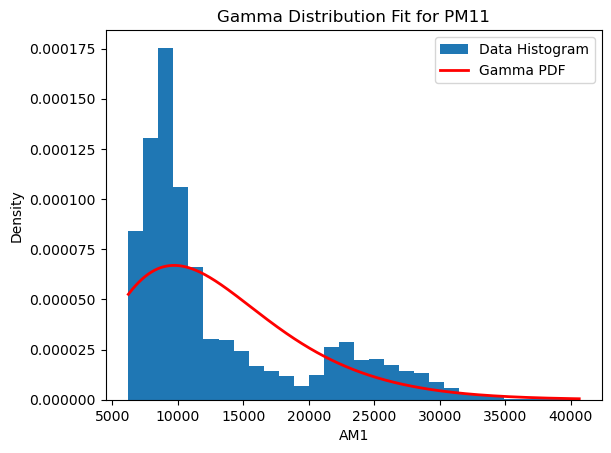

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Calculate the mean and variance of the column
column_data = df['AM1'].dropna()  # Ensure no NaN values
sample_mean = column_data.mean()
sample_variance = column_data.var(ddof=1)  # ddof=1 for sample variance

# Calculate the method of moments estimates for alpha and beta
alpha_mom = sample_mean**2 / sample_variance
beta_mom = sample_mean / sample_variance

# Define the range of x values for the gamma PDF
x = np.linspace(min(column_data), max(column_data), 1000)

# Calculate the gamma PDF values for the x range
gamma_pdf = gamma.pdf(x, a=alpha_mom, scale=1/beta_mom)

# Plot the histogram of the AM1 column
plt.hist(column_data, bins=30, density=True, label='Data Histogram')

# Plot the gamma distribution PDF over the histogram
plt.plot(x, gamma_pdf, 'r-', lw=2, label='Gamma PDF')

# Add titles and labels
plt.title(f'Gamma Distribution Fit for PM11')
plt.xlabel('AM1')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


# HW2

Build a generative model allowing you to actually roll your gaussian-loaded die and generate random variates. Then, generate 100 random variates from it. Plot their histogram. How close does it match the theoretical histogram? Evaluate the error.

**Parameters for the Gaussian-loaded Die**:
   - `mean`: The middle value of a 6-sided die.
   - `std_dev`: Standard deviation, chosen to keep most of the probability within the range 1-6.

**Generating Gaussian-Loaded Die Values**:
   - A truncated normal distribution is defined to simulate the behavior of a die roll.
   - Bounds for truncation are calculated to confine the distribution within the range of a 6-sided die.
   - Random variates are generated from the truncated normal distribution and rounded to the nearest whole number.

**Plotting**:
   - A histogram of the generated die values is plotted.
   - Theoretical probability density function (PDF) for the Gaussian distribution is plotted for comparison.
   - Titles, labels, and legends are added to the plot for clarity.

**Error Evaluation**:
   - Mean squared error (MSE) between the empirical distribution and the theoretical PDF is evaluated.
   - Empirical probabilities are calculated based on the generated die values.
   - Theoretical probabilities for discrete outcomes (1 through 6) are calculated using the truncated normal distribution.
   - MSE is calculated as the mean of the squared differences between empirical and theoretical probabilities.

**Output**:
   - The calculated MSE is displayed.

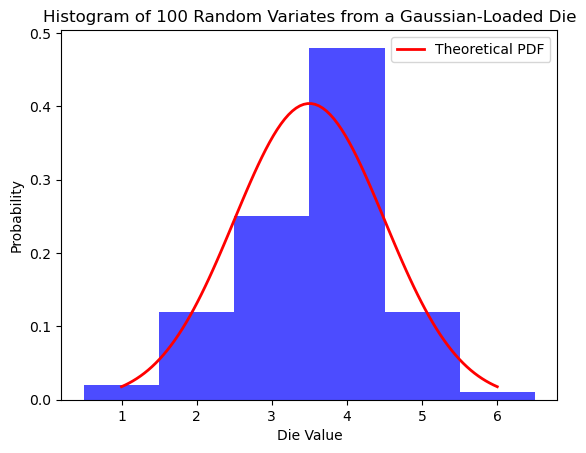

0.004646076702207182

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm

# Parameters for the Gaussian-loaded die
mean = 3.5  # The middle value of a 6-sided die
std_dev = 1.0  # Standard deviation - chosen to keep most of the probability within 1-6

# Since a real die can only take on discrete values, we simulate this by defining a truncated normal distribution
# that only generates values within the range of a 6-sided die, then rounding the outcomes to the nearest whole number.
a, b = (1 - mean) / std_dev, (6 - mean) / std_dev  # Calculate the bounds for truncation
truncated_normal = truncnorm(a, b, loc=mean, scale=std_dev)

# Generate 100 random variates
random_variates = truncated_normal.rvs(100)
rounded_variates = np.round(random_variates)

# Plot the histogram of generated variates
plt.hist(rounded_variates, bins=np.arange(1, 8) - 0.5, density=True, alpha=0.7, color='blue')
plt.title("Histogram of 100 Random Variates from a Gaussian-Loaded Die")
plt.xlabel("Die Value")
plt.ylabel("Probability")
plt.xticks(range(1, 7))

# For comparison, plot the theoretical probability density function (PDF) for the Gaussian distribution
x = np.linspace(1, 6, 100)
pdf = truncated_normal.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

plt.legend()
plt.show()

# Evaluate the error between the empirical distribution and the theoretical PDF
# Using a simple metric - mean squared error (MSE) between the empirical probabilities and theoretical probabilities
# First, calculate the empirical probabilities
empirical_probs, _ = np.histogram(rounded_variates, bins=np.arange(1, 8), density=True)

# Then, calculate theoretical probabilities for discrete outcomes (1 through 6)
theoretical_probs = [truncated_normal.cdf(i + 0.5) - truncated_normal.cdf(i - 0.5) for i in range(1, 7)]

# Calculate MSE
mse = np.mean((empirical_probs - theoretical_probs) ** 2)

mse

# HW3

Find a simple dataset with a one-humped histogram and model it by matching with the pdfs we learned till today. Find the most likely parameters for your pdf using MLE. 

The Method of Moments (MOM) is the simplest method to find out the parameters of an analytic distribution that matches your empirical distribution.

**Calculating Statistics**:
   - Logarithm of mean values and mean of logarithmic values are calculated for each column in `numerical_df`.

**Defining Log-Likelihood Derivatives**:
   - Functions `dlgamma` and `dl2gamma` are defined as the first and second derivatives of the log-likelihood function for the gamma distribution.

**Finding Maximum Likelihood Estimates (MLE)**:
   - Using the Newton-Raphson method (`newton`) to find the MLE of alpha for the column 'PM11'.
   - MLE of beta for 'PM11' is calculated based on the MLE of alpha and the mean of the 'PM11' column.

**Plotting**:
   - Histogram of the 'PM11' column data is plotted with 30 bins and density normalization.
   - A range of x values is defined for the gamma probability density function (PDF).
   - Gamma distribution PDFs are plotted using Method of Moments (MOM) parameters and MLE parameters.
   - Titles, labels, and legends are added to the plot for clarity.

**Displaying the Plot**:
   - The plot is displayed using `plt.show()`.

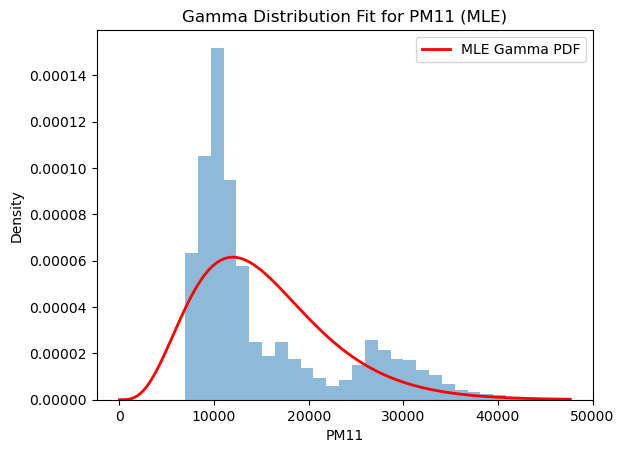

In [58]:
from scipy.special import psi, polygamma
from scipy.optimize import newton
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns from DataFrame
numerical_df = df.select_dtypes(include=[np.number])

# Calculate statistics
log_mean = numerical_df.mean().apply(np.log)
mean_log = numerical_df.apply(np.log).mean()

# Define the log-likelihood derivatives
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1. / m - polygamma(1, m)

# Using the Newton-Raphson method to find the MLE of alpha for 'PM11'
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean['PM11'], mean_log['PM11']))

# Calculate MLE of beta for 'PM11'
beta_mle = alpha_mle / numerical_df['PM11'].mean()

# Plot the histogram of 'PM11'
pm11 = numerical_df['PM11']
pm11.hist(density=True, bins=30, grid=False, alpha=0.5)

# Define the range of x values for the gamma PDF
x = np.linspace(0, pm11.max(), 1000)

# Plot the gamma distribution PDF using MLE parameters only
plt.plot(x, gamma.pdf(x, alpha_mle, scale=1/beta_mle), 'r-', lw=2, label='MLE Gamma PDF')

plt.xlabel('PM11')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit for PM11 (MLE)')
plt.legend()
plt.show()


## Comparison of MLE and MOM

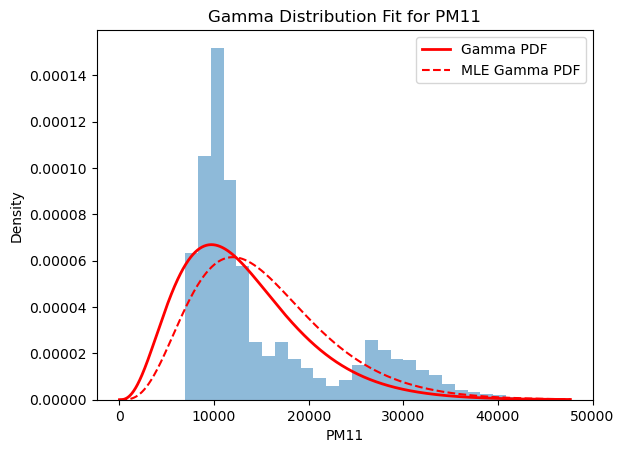

In [59]:
from scipy.special import psi, polygamma
from scipy.optimize import newton
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


numerical_df = df.select_dtypes(include=[np.number])

# Calculate statistics
log_mean = numerical_df.mean().apply(np.log)
mean_log = numerical_df.apply(np.log).mean()

# dlgamma and dl2gamma are the first and second derivatives of the log-likelihood function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

# Using the Newton-Raphson method to find the MLE of alpha for 'PM11'
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean['PM11'], mean_log['PM11']))

# Calculate MLE of beta for 'PM11'
beta_mle = alpha_mle / numerical_df['PM11'].mean()

# Plot the histogram of 'PM11'
pm11 = numerical_df['PM11']
pm11.hist(density=True, bins=30, grid=False, alpha=0.5)

# Define the range of x values for the gamma PDF
x = np.linspace(0, pm11.max(), 1000)

# Plot the gamma distribution PDF using MLE and MOM parameters
plt.plot(x, gamma.pdf(x, a=alpha_mom, scale=1/beta_mom), 'r-', lw=2, label='Gamma PDF')
plt.plot(x, gamma.pdf(x, alpha_mle, scale=1/beta_mle), 'r--', label='MLE Gamma PDF')

plt.xlabel('PM11')
plt.ylabel('Density')
plt.title('Gamma Distribution Fit for PM11')
plt.legend()
plt.show()

Both MOM and MLE approaches provide parameter estimates for fitting a gamma distribution to the data.

In this case, both MOM and MLE approaches yield gamma distribution fits that appear to capture the underlying distribution of the data adequately.